In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("https://gist.githubusercontent.com/Pshemkoo/1dcd2f7d85ea7019d394391fcd4450c0/raw/9f9d38c148ee8011569b44678906011872eb9fc5/salaries.csv")
data.head()

,Unnamed: 0,sex,rk,years,dg,yd,salary
0,0,male,full,25,doctorate,35,36350
1,1,male,full,13,doctorate,22,35350
2,2,male,full,10,doctorate,23,28200
3,3,female,full,7,doctorate,27,26775
4,4,male,full,19,masters,30,33696


In [5]:
data.columns

Index(['Unnamed: 0', 'sex', 'rk', 'years', 'dg', 'yd', 'salary'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52 non-null     int64 
 1   sex         52 non-null     object
 2   rk          52 non-null     object
 3   years       52 non-null     int64 
 4   dg          52 non-null     object
 5   yd          52 non-null     int64 
 6   salary      52 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 3.0+ KB


In [7]:
data.describe()

,Unnamed: 0,years,yd,salary
count,52.000000,52.000000,52.000000,52.000000
mean,25.500000,7.480769,16.115385,23797.653846
std,15.154757,5.507536,10.222340,5917.289154
min,0.000000,0.000000,1.000000,15000.000000
25%,12.750000,3.000000,6.750000,18246.750000
50%,25.500000,7.000000,15.500000,23719.000000
75%,38.250000,11.000000,23.250000,27258.500000
max,51.000000,25.000000,35.000000,38045.000000


In [8]:
data.shape

(52, 7)

In [10]:
bins = (0,20000,38045)
group_names = ['low', 'high']
data['salary'] = pd.cut(data['salary'], bins= bins, labels=group_names)
data.head()

,Unnamed: 0,sex,rk,years,dg,yd,salary
0,0,male,full,25,doctorate,35,high
1,1,male,full,13,doctorate,22,high
2,2,male,full,10,doctorate,23,high
3,3,female,full,7,doctorate,27,high
4,4,male,full,19,masters,30,high


In [11]:
from sklearn.preprocessing import LabelEncoder
labels_ = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)
data.head()

,Unnamed: 0,sex,rk,years,dg,yd,salary
0,0,1,2,17,0,28,0
1,1,1,2,13,0,19,0
2,2,1,2,10,0,20,0
3,3,0,2,7,0,22,0
4,4,1,2,16,1,24,0


In [13]:
X=data.iloc[:, :-1].values
y= data['salary'].values
print(X[:5])
print(y[:5])

[[ 0  1  2 17  0 28]
 [ 1  1  2 13  0 19]
 [ 2  1  2 10  0 20]
 [ 3  0  2  7  0 22]
 [ 4  1  2 16  1 24]]
[0 0 0 0 0]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 12)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

1.0

[Text(0.625, 0.875, 'X[2] <= 0.5\ngini = 0.39\nsamples = 49\nvalue = [36, 13]'),
 Text(0.5, 0.625, 'X[3] <= 8.5\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.25, 0.375, 'X[0] <= 50.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.375, 'X[0] <= 25.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]')]

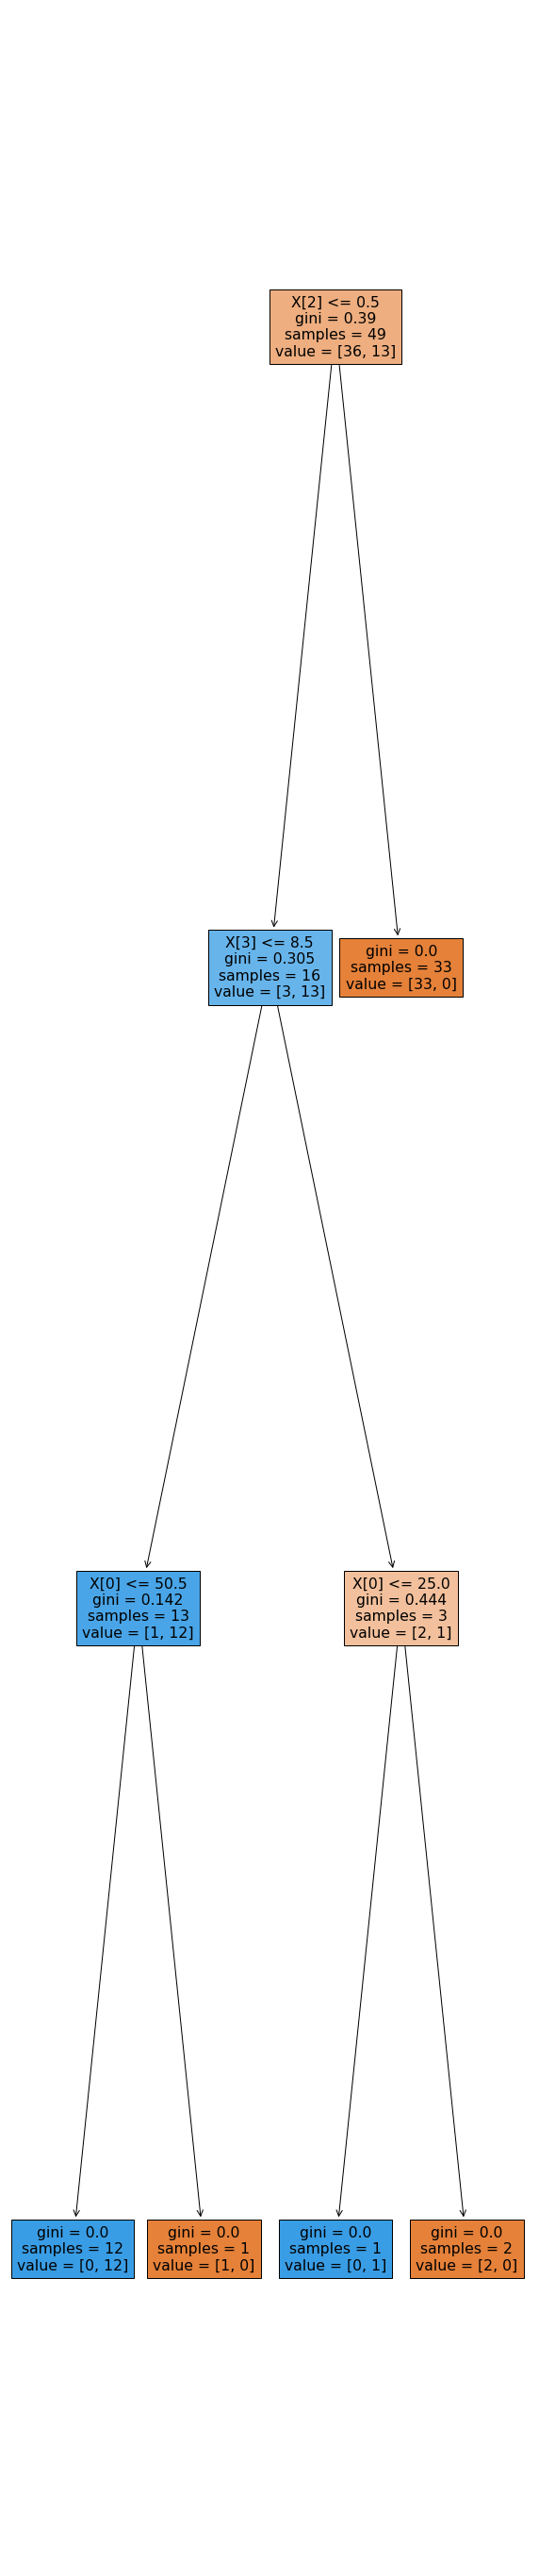

In [17]:
from sklearn import tree
plt.figure(figsize=(10,50))
tree.plot_tree(classifier, filled=True)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
Predit_y = classifier.predict(X_test)
print(confusion_matrix(y_test, Predit_y))
print(classification_report(y_test, Predit_y))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

